# MACHINE LEARNING LAB-5:LOGISTIC REGRESSION:
<hr/>

**Submitted by: <br>**
Name: **Stebin George** <br>
Register Number: **21122061** <br>
Class: **2MSCDS** <br> 
<hr/>


## Lab Overview  
### Objectives

**TO get to know more anbout the logistic regression using the breast cancer dataset**

### LIBRARIES:


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Questions:
Apply Logistic Regression for Breast Cancer Dataset.
Use 60:40 train-test ratio for splitting the dataset.

1. Demonstrate the Logistic Regression for different penalties/regularisation methods - none, l1, l2 (you may use 'saga' solver as the parameter)
2. What happens when the Maximum Iterations are kept as 1, 2, 5, 10, 20, 50, 100, 500 and 1000? Is there any change in the accuracy.
3. Get the attributes: classes_, coef_ and intercept_ and print the same in the above case.

### Problem Definition:

**This problem tries to predict the cancer predictions amoung the cancer dataset.The dataset used is cancer dataset in kaggle.**

### Approach

* Importing the necessary libraries
* analysing the data and doing the basic operations
* doing the EDA and pre-processing steps
* Loading the logistic regression function
* checking for the accuracy
* usage of penalties and maximum iter

### Sections

1. Libraries
1. introduction
1. EDA
1. MODEL BUILDING
1. Q&A
1. Conclusion

### References

1. https://www.quora.com/What-is-regularization-in-machine-learning
2. https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a
3. https://towardsdatascience.com/regularization-an-important-concept-in-machine-learning-5891628907ea

### Loading Dataset:

In [2]:
df=pd.read_csv(r"C:\Users\stebi\OneDrive\Desktop\data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#checking the shape
df.shape

(569, 33)

**Datset has 569 rows and 33 columns**

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


**GIVES THE SUMMARY OF THE DATASET**

### CHECKING NULL VALUES:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
df.dropna(axis=1,inplace=True)

**We have dropped the entire column with  null values.**

### LabelEnocding

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[:,1] = labelencoder.fit_transform(df.iloc[:,1].values)

**Here the target variables are being encoded into numerical values as the exisiting dataset contains out put as 'M','B'.**

In [10]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Here 'M' is 1 and 'B' is 0.**

### EDA:

Number of Benign:  357
Number of Malignant :  212


C:\Users\stebi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


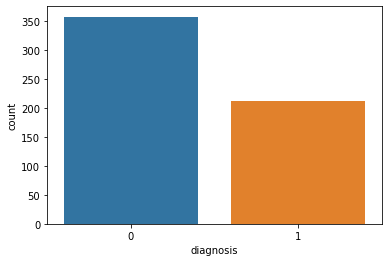

In [11]:
ax = sns.countplot(df.diagnosis,label="Count")   
B, M =df.diagnosis  .value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

**THE benign tumour has a number of 357 whereas the malignant tumour has the size of about 212.**

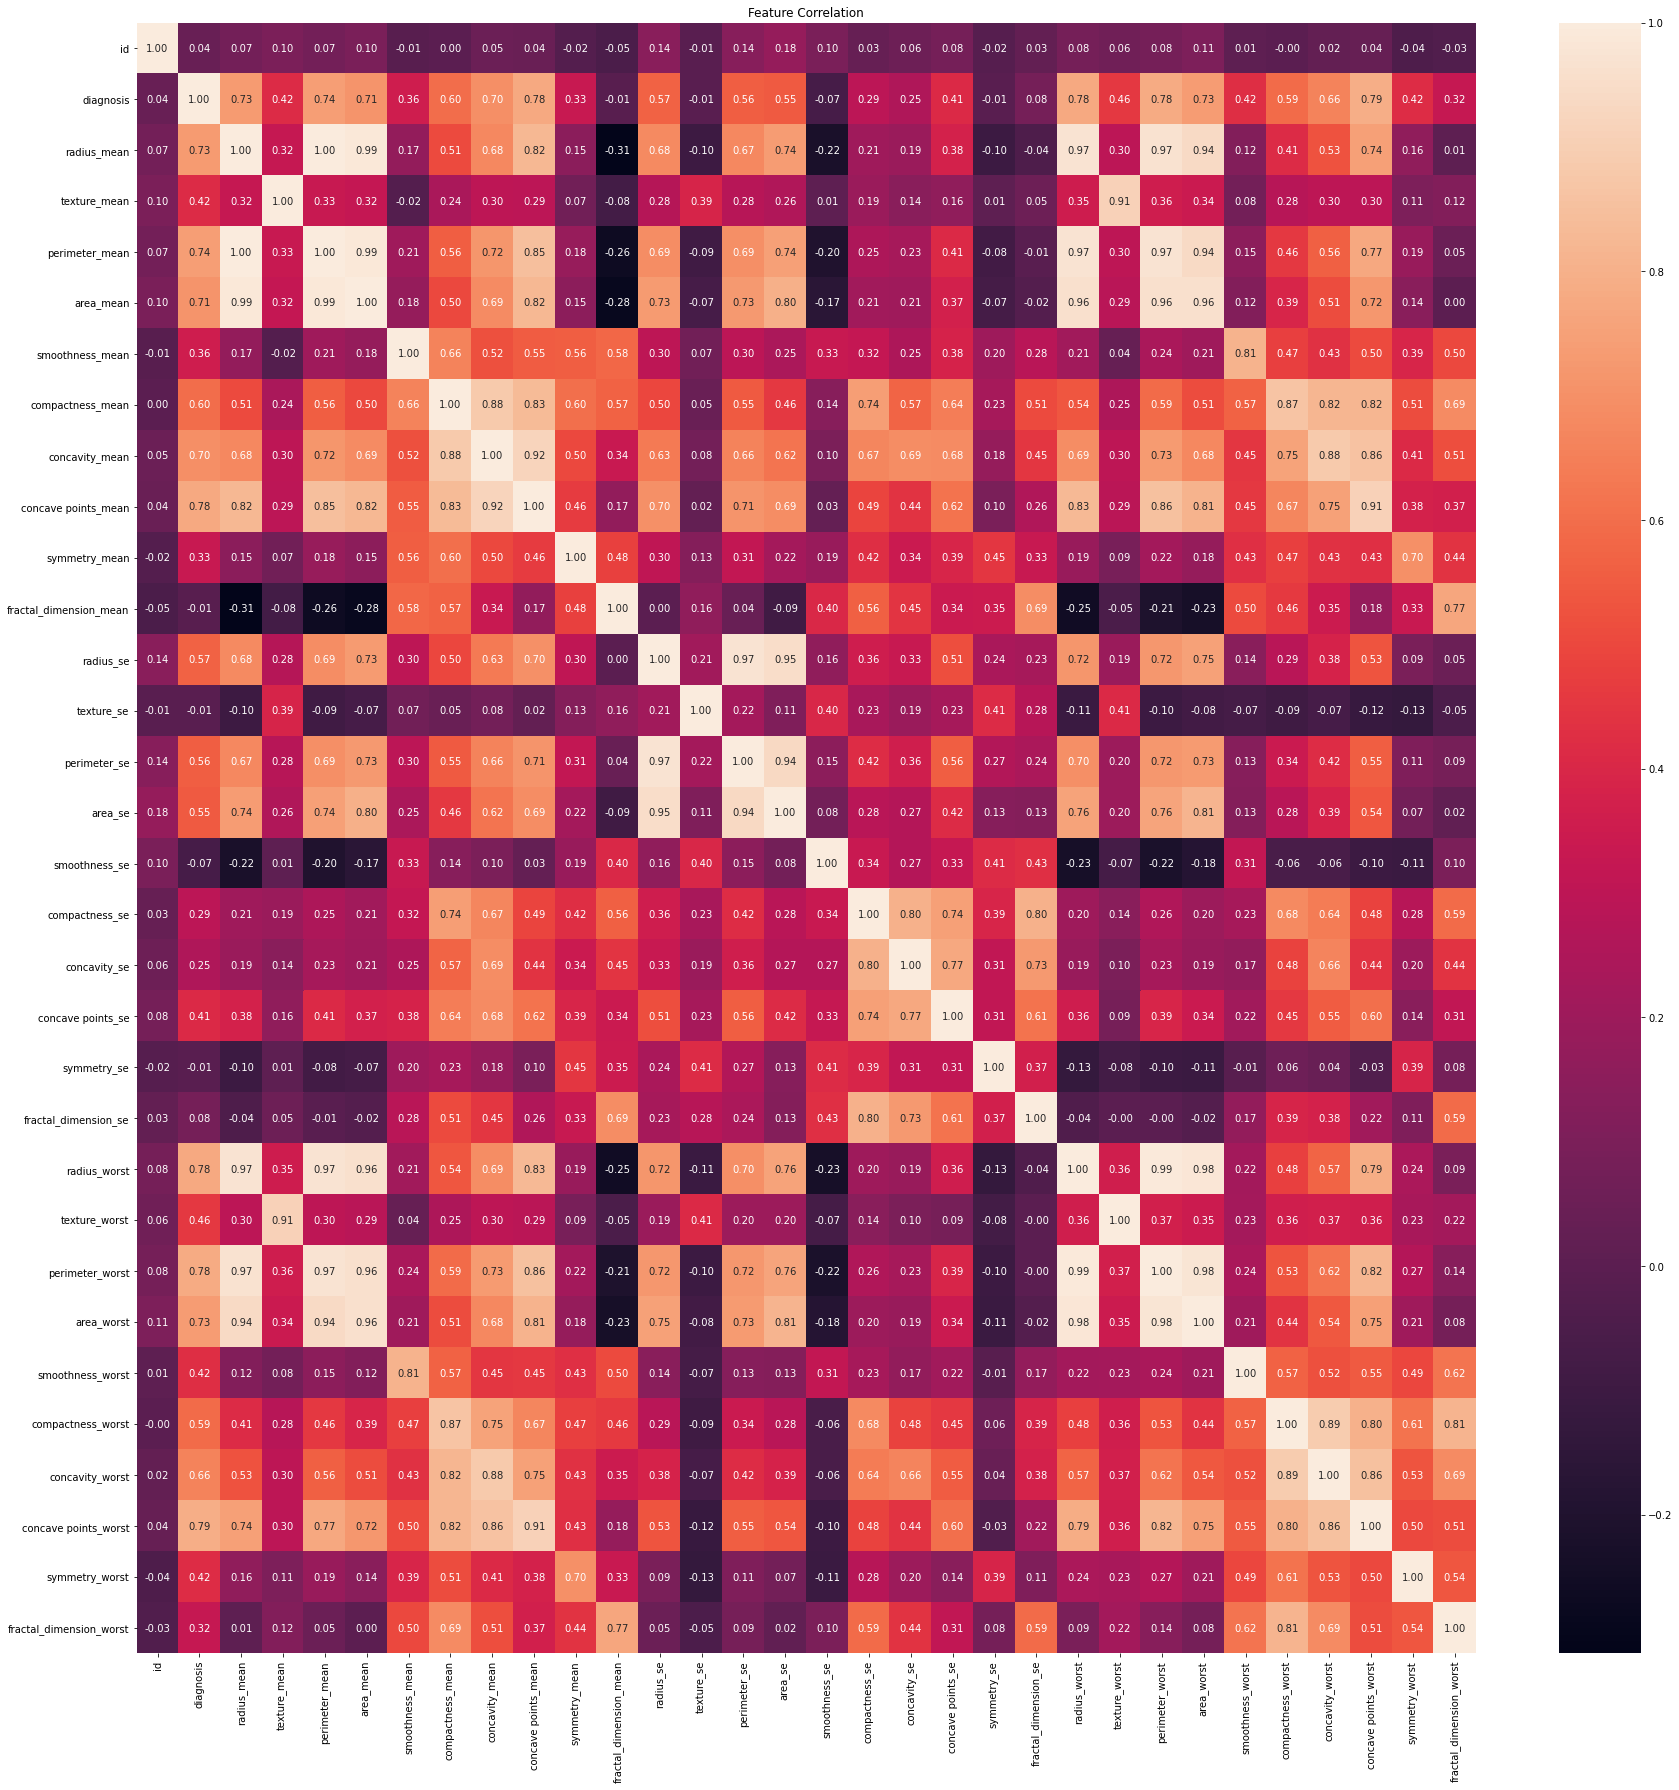

In [12]:
# Correlation Matrix
plt.figure(figsize=(30,30))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, fmt = '.2f',)
plt.title("Feature Correlation")
plt.show() 

**The above graph shows the correlation plot of the different variables in the dataset.**

In [13]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


### Feature contributions to the target variable:

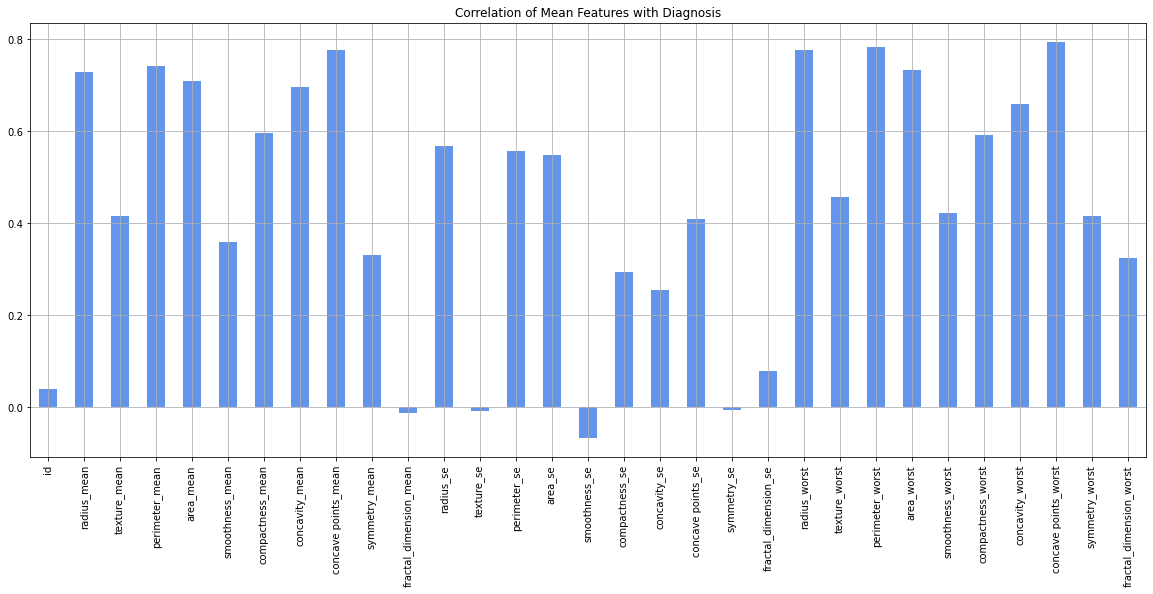

In [14]:
df_mean = df[df.columns[:]]
plt.figure(figsize=(20, 8))
df_mean.drop('diagnosis', axis=1).corrwith(df_mean.diagnosis).plot(kind='bar', grid=True, title="Correlation of Mean Features with Diagnosis", color="cornflowerblue");

### MODEL BUILDING:
#### LOGISTIC REGRESSION:

In [15]:
import warnings
warnings.filterwarnings('ignore')

**Splitting the data**

In [16]:
X = df.iloc[:,2:]
y = df.iloc[:,1]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=42)

In [18]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
296,10.91,12.35,69.14,363.7,0.08518,0.04721,0.01236,0.01369,0.1449,0.06031,...,11.37,14.82,72.42,392.2,0.09312,0.07506,0.02884,0.03194,0.2143,0.06643
490,12.25,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,0.05976,...,14.17,31.99,92.74,622.9,0.12560,0.18040,0.12300,0.06335,0.3100,0.08203
519,12.75,16.70,82.51,493.8,0.11250,0.11170,0.03880,0.02995,0.2120,0.06623,...,14.45,21.74,93.63,624.1,0.14750,0.19790,0.14230,0.08045,0.3071,0.08557
513,14.58,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.04349,0.1739,0.05640,...,16.76,17.24,108.50,862.0,0.12230,0.19280,0.24920,0.09186,0.2626,0.07048
473,12.27,29.97,77.42,465.4,0.07699,0.03398,0.00000,0.00000,0.1701,0.05960,...,13.45,38.05,85.08,558.9,0.09422,0.05213,0.00000,0.00000,0.2409,0.06743


**Standardizing the dataset:**

In [19]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**LOGISTIC REGRESSION:**

In [20]:
classifer = LogisticRegression()
classifer.fit(X_train, y_train)

LogisticRegression()

**Prediction on Unseen data:**

In [21]:
predictions  = classifer.predict(X_test)
predictions

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0])

# Q2:

**What happens when the Maximum Iterations are kept as 1, 2, 5, 10, 20, 50, 100, 500 and 1000? Is there any change in the accuracy.**

In [22]:
l1=[1, 2, 5, 10, 20, 50, 100, 500,1000]
iteration1=[]
accuracy=[]
for i in l1:
    classifer = LogisticRegression(max_iter=i)
    classifer.fit(X_train, y_train)
    predictions  = classifer.predict(X_test)
    accuracy.append(accuracy_score(y_test,predictions))
    iteration1.append(i)

In [23]:
score1=pd.DataFrame()
score1['iteration']=iteration1
score1['accuracy']=accuracy
score1

,iteration,accuracy
0,1,0.934211
1,2,0.969298
2,5,0.991228
3,10,0.982456
4,20,0.982456
5,50,0.982456
6,100,0.982456
7,500,0.982456
8,1000,0.982456


**The accuaracy is maximum at 5 iteration state and the accuracy changes for each iterations as well**

# Q1:

**Demonstrate the Logistic Regression for different penalties/regularisation methods - none, l1, l2 (you may use 'saga' solver as the parameter.**

𝗥𝗲𝗴𝘂𝗹𝗮𝗿𝗶𝘇𝗮𝘁𝗶𝗼𝗻 𝗶𝗻 𝗠𝗮𝗰𝗵𝗶𝗻𝗲 𝗟𝗲𝗮𝗿𝗻𝗶𝗻𝗴
As mentioned above, regularization is used to avoid overfitting due to complex models. When a regularization model is used, the learning model takes only a limited set of parameters. Instead of choosing parameters from a discrete grid, this process chooses values from a continuum that produces a smoothing effect (thereby reducing the noise terms).
In ML models, individual significance of variables and interaction effects is not observed stage wise. In such a case, regularization also helps in the selection process of features contribute to the model. The regularization methods in ML generally adds some kind of penalty to the cost function which is further used in the adjustment process.

L1 and L2 are two types of regularization techniques. Both of these models introduces an additional term of "penalty" on the model based on the error function. The process of weight adjustment hence will also consider the penalty that is applied by these penalties. The key difference between these two is the penalty term.

𝗟𝟭 𝗥𝗲𝗴𝘂𝗹𝗮𝗿𝗶𝘇𝗮𝘁𝗶𝗼𝗻:
L1 (Lazzo) regularization uses the sum of the absolute values of the weights is considered as a penalty. This type is preferred when the model is generally linear in nature with lesser number of coefficients, since it encourages the convergence towards 0. It is also useful for the case of considering a categorical variable with many levels (as mention above, helps in feature selection).

𝗟𝟮 𝗥𝗲𝗴𝘂𝗹𝗮𝗿𝗶𝘇𝗮𝘁𝗶𝗼𝗻:
L2 (Ridge) regularization uses the sum of squared values of weights as the penalty. It tries to make the convergence closer to 0 and prevents overfitting; which becomes very useful when the number of variables are very large and smaller data samples. Genomic data is a very good example to apply L2 regularization.

The regularization parameter penalizes all parameters except intercept; and as the complexity of the model is increased, it also adds penalty for the higher terms. Apart from L1 and L2 regularization techniques, there is something also known as "Elastic Net" which is a hybrid type of both of these techniques.

In [24]:
l2=['l1','l2','none']
pen=[]
accuracy=[]
iteration=[]
l1=[1, 2, 5, 10, 20, 50, 100, 500,1000]
for i in l1:
    for j in l2:
        classifer = LogisticRegression(penalty=j,solver='saga',max_iter=i)
        classifer.fit(X_train, y_train)
        predictions = classifer.predict(X_test)
        pen.append(j)
        accuracy.append(accuracy_score(y_test,predictions))
        iteration.append(i)

In [25]:
score=pd.DataFrame()
score['penalty']=pen
score['iteration']=iteration
score['accuracy']=accuracy
score

,penalty,iteration,accuracy
0,l1,1,0.978070
1,l2,1,0.978070
2,none,1,0.982456
3,l1,2,0.982456
4,l2,2,0.978070
5,none,2,0.978070
6,l1,5,0.986842
7,l2,5,0.991228
8,none,5,0.986842
9,l1,10,0.986842


**the value of the accuracy changes for different penalties.**

## Confusion Matrix for different iteration values and penalties:

 for penalty:l1 iteration :1 


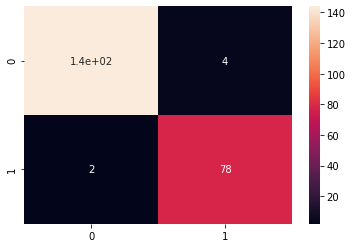

 for penalty:l2 iteration :1 


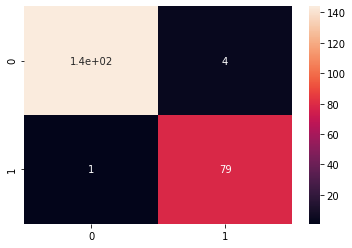

 for penalty:none iteration :1 


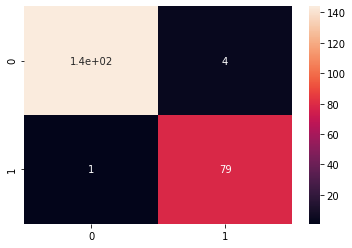

 for penalty:l1 iteration :2 


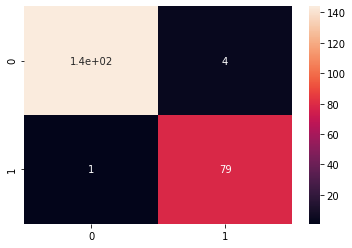

 for penalty:l2 iteration :2 


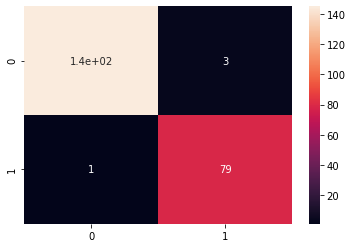

 for penalty:none iteration :2 


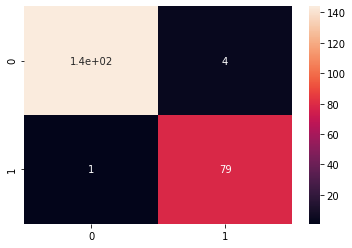

 for penalty:l1 iteration :5 


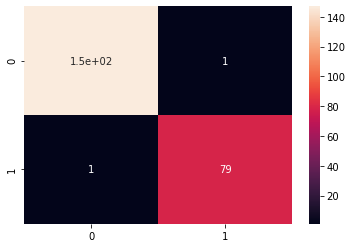

 for penalty:l2 iteration :5 


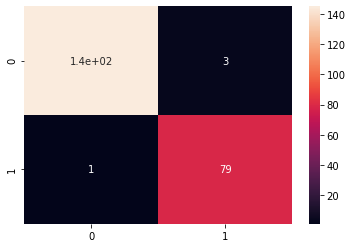

 for penalty:none iteration :5 


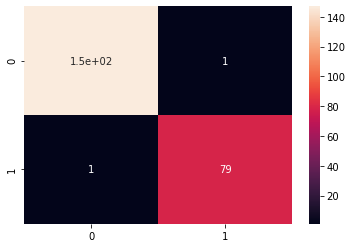

 for penalty:l1 iteration :10 


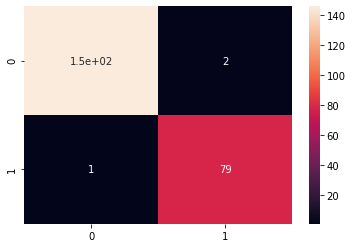

 for penalty:l2 iteration :10 


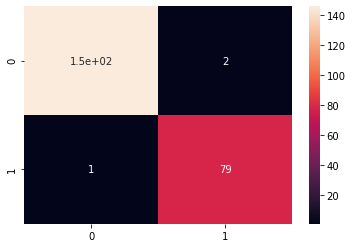

 for penalty:none iteration :10 


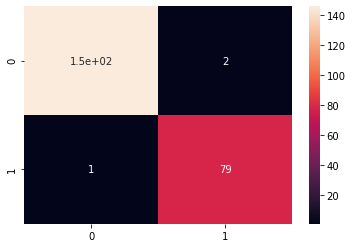

 for penalty:l1 iteration :20 


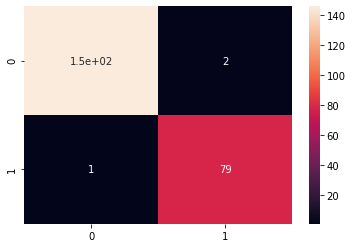

 for penalty:l2 iteration :20 


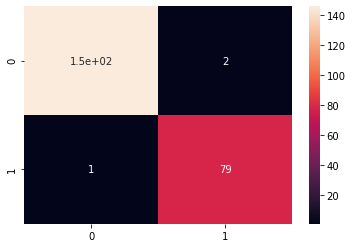

 for penalty:none iteration :20 


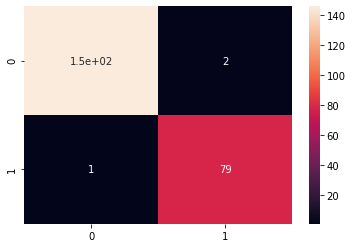

 for penalty:l1 iteration :50 


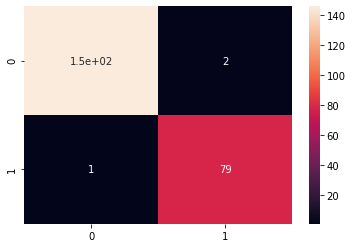

 for penalty:l2 iteration :50 


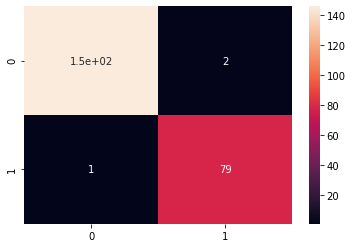

 for penalty:none iteration :50 


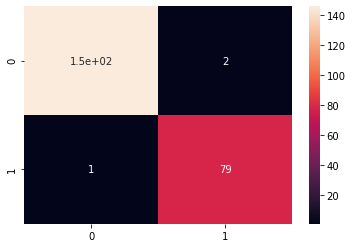

 for penalty:l1 iteration :100 


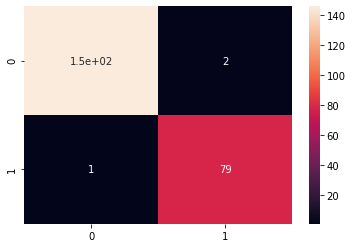

 for penalty:l2 iteration :100 


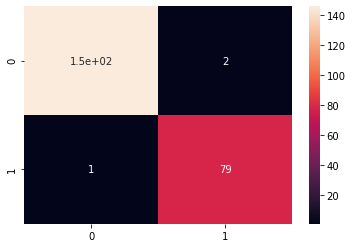

 for penalty:none iteration :100 


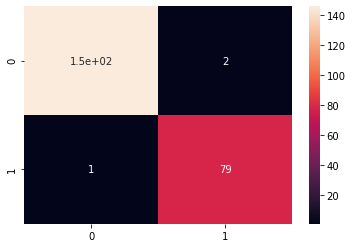

 for penalty:l1 iteration :500 


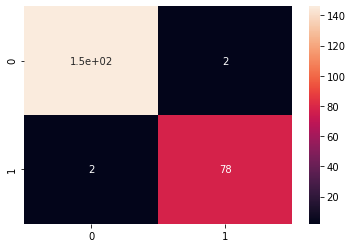

 for penalty:l2 iteration :500 


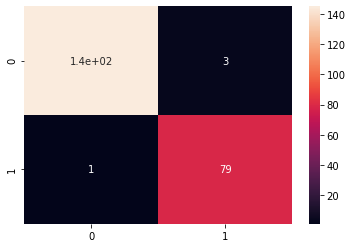

 for penalty:none iteration :500 


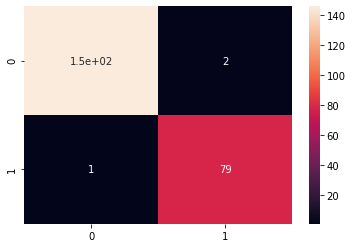

 for penalty:l1 iteration :1000 


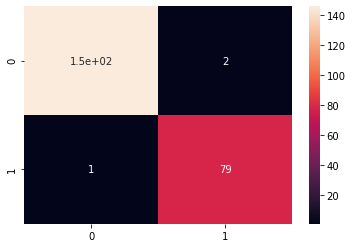

 for penalty:l2 iteration :1000 


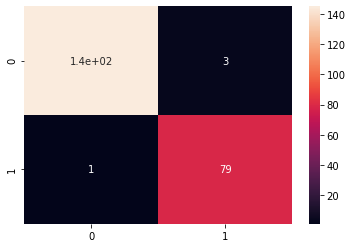

 for penalty:none iteration :1000 


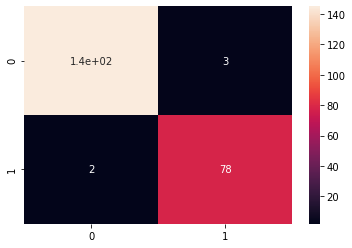

In [26]:
l2=['l1','l2','none']
pen=[]
accuracy=[]
iteration=[]
l1=[1, 2, 5, 10, 20, 50, 100, 500,1000]
for i in l1:
    for j in l2:
        print(f"\033[1m for penalty:{j} iteration :{i} \033[0m")
        classifer = LogisticRegression(penalty=j,solver='saga',max_iter=i)
        classifer.fit(X_train, y_train)
        predictions = classifer.predict(X_test)
        cm = confusion_matrix(y_test, predictions)
        sns.heatmap(cm, annot=True,)
        plt.show()

## Q3)

**Get the attributes: classes_, coef_ and intercept_ and print the same in the above case.**

In [27]:
print(classifer.classes_)

[0 1]


**Class will give the classification criteria's**

In [28]:
print(classifer.coef_)

[[-0.08209231 -0.24271427 -0.14039311  0.14068608 -0.02724844 -2.60382948
   1.64202895  2.92180359 -1.0494043   0.60192373  2.99381621 -0.59572542
   1.14023774  2.03985847  0.31522363 -0.32408321 -0.74506811  1.4220966
  -1.07014165 -1.37504414  1.29477287  2.91693097  0.43178706  1.27633799
   0.3692476  -1.03686318  2.32426085  1.45587324  2.99661001  0.00993696]]


**coef_ attribute is also used to view the model's coefficients.**

In [29]:
print(classifer.intercept_)

[0.50431558]


**The value of 𝑏₀, also called the intercept, shows the point where the estimated regression line crosses the 𝑦 axis.**

### coeff,class and intercept in a single dataframe:

In [30]:
l2=['l1','l2','none']
pen=[]
accuracy=[]
iteration=[]
cls=[]
intercept=[]
l1=[1, 2, 5, 10, 20, 50, 100, 500,1000]
for i in l1:
    for j in l2:
        classifer = LogisticRegression(penalty=j,solver='saga',max_iter=i)
        classifer.fit(X_train, y_train)
        predictions = classifer.predict(X_test)
        pen.append(j)
        accuracy.append(accuracy_score(y_test,predictions))
        iteration.append(i)
        cls.append(classifer.classes_)
        intercept.append(classifer.intercept_)

In [31]:
score=pd.DataFrame()
score['penalty']=pen
score['iteration']=iteration
score['class']=cls
score['intercept']=intercept
score['accuracy']=accuracy
score

,penalty,iteration,class,intercept,accuracy
0,l1,1,"[0, 1]",[-0.23668199745488105],0.978070
1,l2,1,"[0, 1]",[-0.13829212325660264],0.973684
2,none,1,"[0, 1]",[-0.2183925010149449],0.969298
3,l1,2,"[0, 1]",[-0.2884212079162961],0.978070
4,l2,2,"[0, 1]",[-0.2475204446078854],0.978070
5,none,2,"[0, 1]",[-0.22035714382121543],0.973684
6,l1,5,"[0, 1]",[-0.316585280847195],0.991228
7,l2,5,"[0, 1]",[-0.2892900699067467],0.991228
8,none,5,"[0, 1]",[-0.3403412463853296],0.991228
9,l1,10,"[0, 1]",[-0.32936068945772773],0.986842


In [36]:
l2=['l1','l2','none']
l1=[1, 2, 5, 10, 20, 50, 100, 500,1000]
for i in l1:
    for j in l2:
        print(f"\033[1m for penalty:{j} iteration :{i} \033[0m")
        classifer = LogisticRegression(penalty=j,solver='saga',max_iter=i)
        classifer.fit(X_train, y_train)
        print(classifer.coef_)

 for penalty:l1 iteration :1 
[[ 0.29939923  0.18428545  0.29840871  0.29303173  0.11491086  0.14196168
   0.20783063  0.30922839  0.02041179 -0.1108061   0.27789855 -0.04464459
   0.25630959  0.26725932  0.01504474 -0.00784784 -0.04295042  0.06628419
  -0.0061287  -0.12106751  0.34664178  0.19631491  0.34333632  0.33076436
   0.20199335  0.1976854   0.21550931  0.31057107  0.14607356  0.05067992]]
 for penalty:l2 iteration :1 
[[ 0.30772722  0.1476935   0.30861533  0.2923931   0.12821557  0.16855408
   0.2158799   0.32387895  0.11171781 -0.09178241  0.20290227  0.02332918
   0.18086412  0.1852561  -0.00465121 -0.01015706 -0.06885493  0.06500782
   0.02061968 -0.1127541   0.3404487   0.22098434  0.33728278  0.31071569
   0.18703813  0.19074379  0.21417831  0.32611309  0.24138634  0.06907217]]
 for penalty:none iteration :1 
[[ 0.27469465  0.17003401  0.27766449  0.26539881  0.08244562  0.14305233
   0.2106261   0.28895639  0.07347412 -0.11867997  0.248041   -0.00448318
   0.22349573  0

### Conclusion:

**Basic idea about logistic regression was obtained.The accuracy and cionfusion matrix were obtained.**